In [63]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy.integrate import quad, simpson

In [64]:
class randgen(rv_continuous):
    def __init__(self, s):
        super().__init__(a=1e1, b=1e4) # a and b are the lower and upper limits for E respectively
        self.s = s
        self.norm = 1
        self.norm = quad(lambda x: self._pdf(x), 1e1, np.inf)[0]
    
    def _pdf(self, E):
        if self.s >= 0.4:
            E_0 = 44 - 17*(self.s - 1.46)**2
        else:
            E_0 = 26

        f1 = self.s / (E_0 + E)
        f2 = 2e-4 * self.s * (1 + 1e-4 * self.s * E)**(-1)
        f = (0.89 * E_0 - 1.2) / (E_0 + E) **self.s * (1 + 1e-4 * self.s * E)**(-2)
        return - f * (f1 + f2) / self.norm


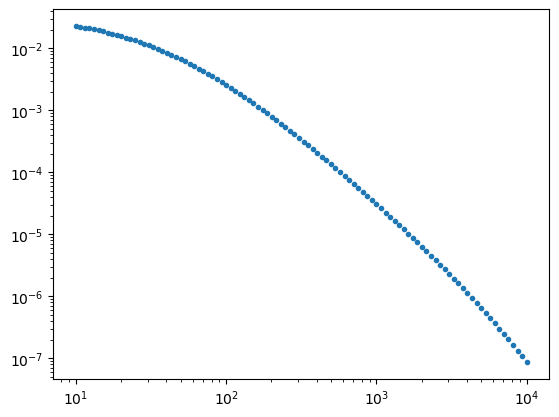

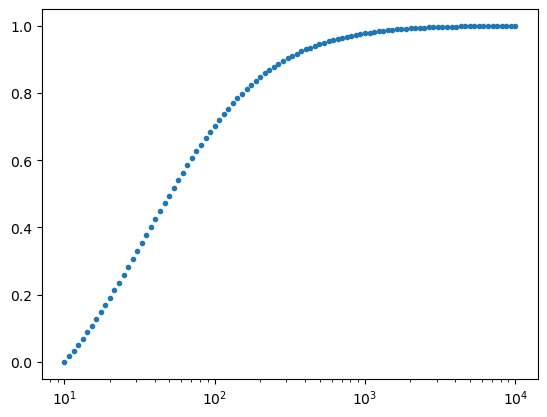

In [65]:
s = 1.2
Es = np.logspace(1,4,100)
rg = randgen(s)
plt.plot(Es, rg._pdf(Es), '.')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(Es, rg._cdf(Es), '.')
plt.xscale('log')
plt.show()

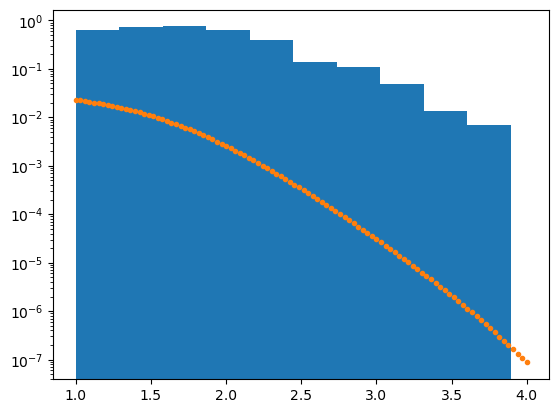

In [66]:
plt.hist(np.log10(rg.rvs(size=1000)), density=True)
plt.plot(np.log10(Es), rg._pdf(Es), '.')
plt.yscale('log')

In [ ]:
class randgen(rv_continuous):
    def __init__(self, s):
        super().__init__(a=1) # a and b are the lower and upper limits for E respectively
        self.s = s
        self.norm = 1
        self.norm = quad(lambda x: self._pdf(x), self.a, 250)[0]
    
    def _pdf(self, x):
        E = 10**x
        if self.s >= 0.4:
            E_0 = 44 - 17*(self.s - 1.46)**2
        else:
            E_0 = 26

        f1 = self.s / (E_0 + E)
        f2 = 2e-4 * self.s * (1 + 1e-4 * self.s * E)**(-1)
        f = (0.89 * E_0 - 1.2) / (E_0 + E) **self.s * (1 + 1e-4 * self.s * E)**(-2)
        return - f * (f1 + f2) / self.norm


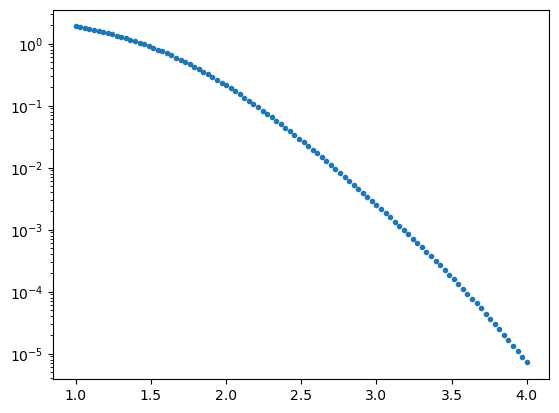

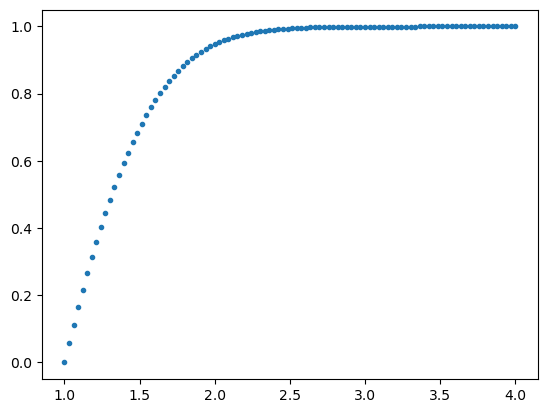

0.9999990331572334


In [68]:
s = 1.2
xs = np.linspace(1,4,100)
rg = randgen(s)
plt.plot(xs, rg._pdf(xs), '.')
plt.yscale('log')
plt.show()

plt.plot(xs, rg._cdf(xs), '.')
plt.show()

print(np.max(rg._cdf(xs)))

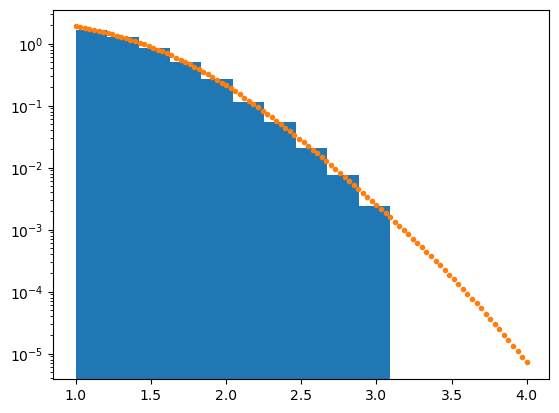

In [69]:
plt.hist((rg.rvs(size=10000)), density=True)
plt.plot(xs, rg._pdf(xs), '.')
plt.yscale('log')

In [70]:
class Test():
    def __init__(self, s):
        self.s = s

In [71]:
s = 1.2
n = 10000
rg = randgen(s)
samples = rg.rvs(size=n)

In [72]:
t = Test(1.2)
s = t.s
n = 10000
rg = randgen(s)
samples = rg.rvs(size=n)